In [1]:
%store -r X_PCA2

In [2]:
%store -r y

In [3]:
#kmeans

In [4]:
from sklearn.metrics import silhouette_score

In [5]:
from sklearn.cluster import KMeans

In [6]:
from matplotlib import pyplot as plt

In [7]:
from matplotlib.colors import ListedColormap

In [8]:
color_list = ['red', 'blue', 'green', 'yellow', 'pink', 'purple', 'orange', 'brown', 'gray', 'magenta', 'cyan']

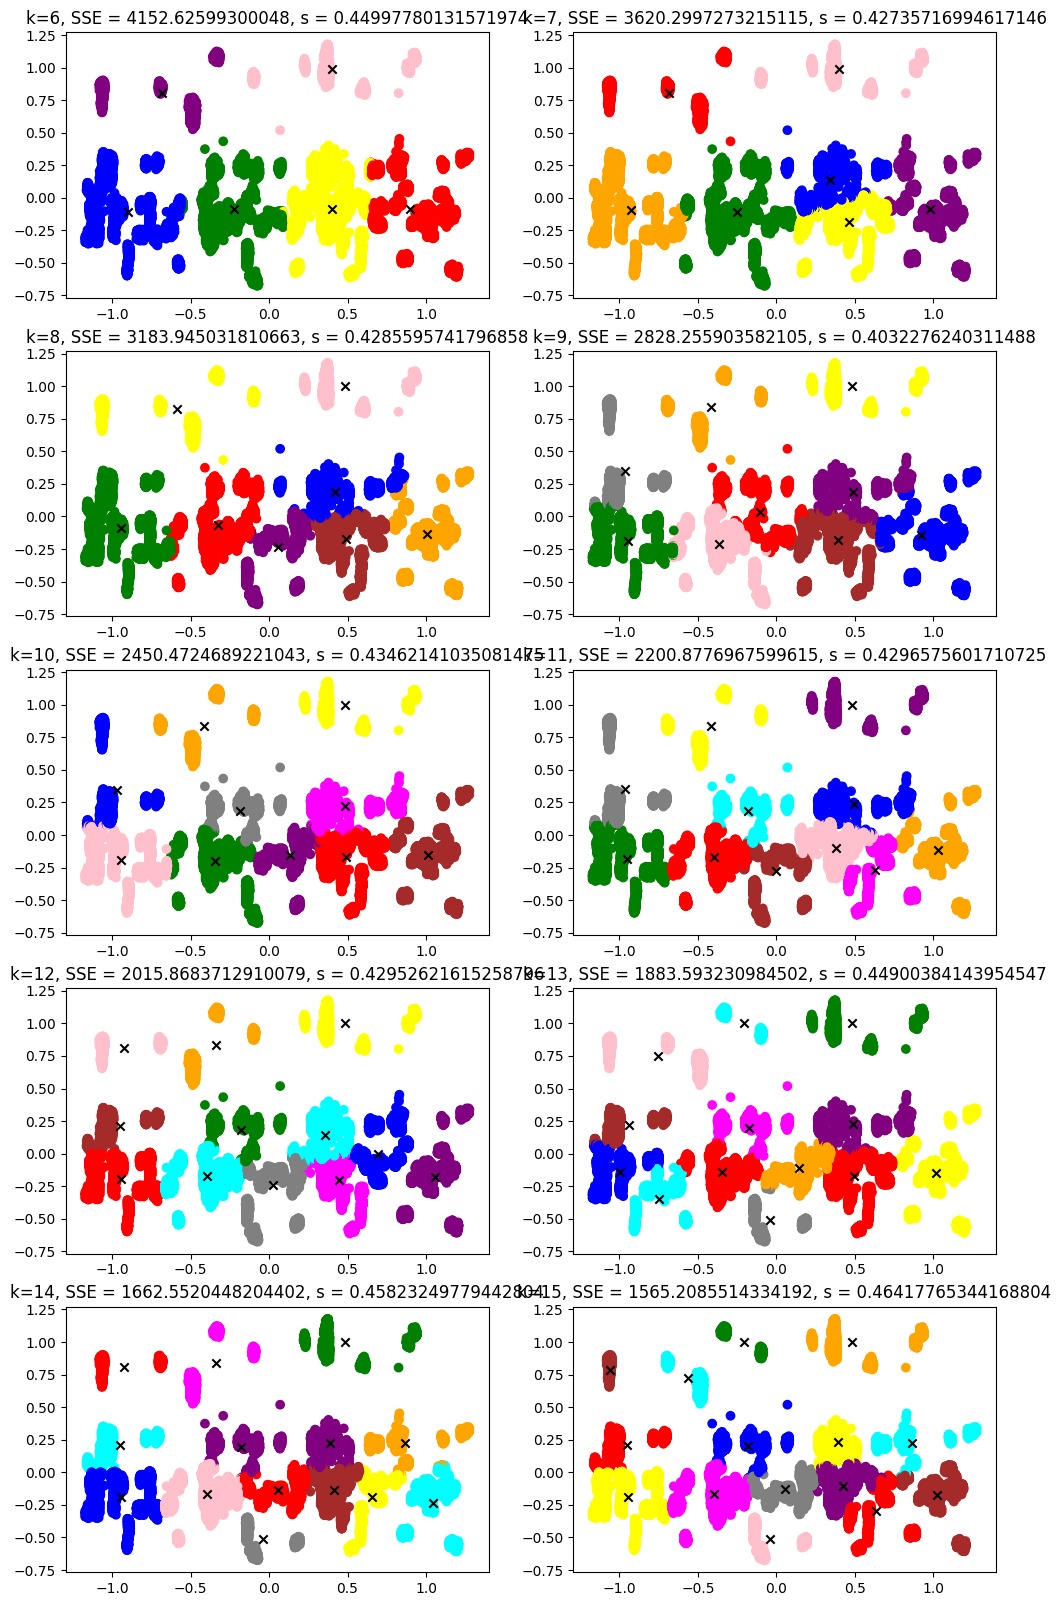

In [59]:
ks = range(6, 16)
inits = ['k-means++']
idx = 1
fig = plt.figure(figsize=(12, 20))

for k in ks:
    for init in inits:
        kmeans = KMeans(n_clusters=k, init=init, n_init=10)
        kmeans.fit(X_PCA2)
        
        fig.add_subplot(int(len(ks)/2), 2, idx)
        idx += 1
        #print(f'ovde{idx}')
        #print(silhouette_score(X_PCA2, kmeans.labels_))
        
        plt.scatter(X_PCA2.iloc[:, 0], X_PCA2.iloc[:, 1], c=kmeans.labels_, cmap= ListedColormap(color_list[:k]))
        
        centroids = pd.DataFrame(kmeans.cluster_centers_)
        plt.scatter(centroids.iloc[:, 0], centroids.iloc[:, 1], c='black', marker='x')
        plt.title(f'k={k}, SSE = {kmeans.inertia_}, s = {silhouette_score(X_PCA2, kmeans.labels_)}')

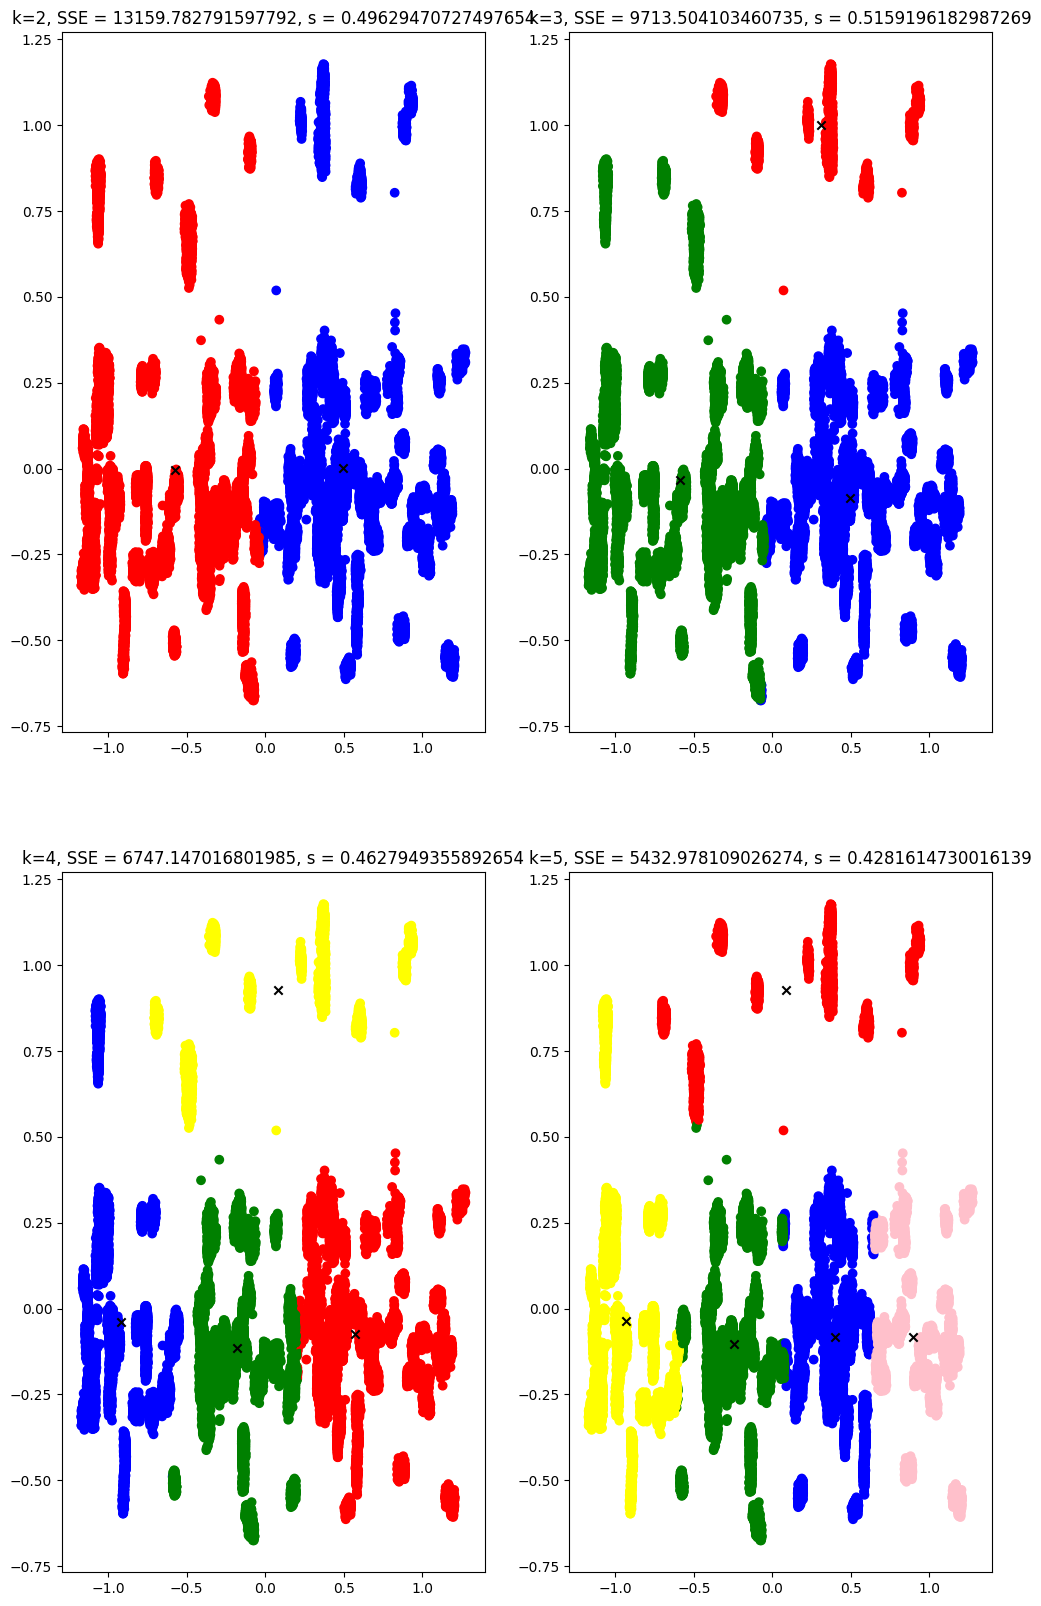

In [60]:
ks = range(2, 6)
inits = ['k-means++']
idx = 1
fig = plt.figure(figsize=(12, 20))

for k in ks:
    for init in inits:
        kmeans = KMeans(n_clusters=k, init=init, n_init=10)
        kmeans.fit(X_PCA2)
        
        fig.add_subplot(int(len(ks)/2), 2, idx)
        idx += 1
        #print(f'ovde{idx}')
        #print(silhouette_score(X_PCA2, kmeans.labels_))
        
        plt.scatter(X_PCA2.iloc[:, 0], X_PCA2.iloc[:, 1], c=kmeans.labels_, cmap= ListedColormap(color_list[:k]))
        
        centroids = pd.DataFrame(kmeans.cluster_centers_)
        plt.scatter(centroids.iloc[:, 0], centroids.iloc[:, 1], c='black', marker='x')
        plt.title(f'k={k}, SSE = {kmeans.inertia_}, s = {silhouette_score(X_PCA2, kmeans.labels_)}')

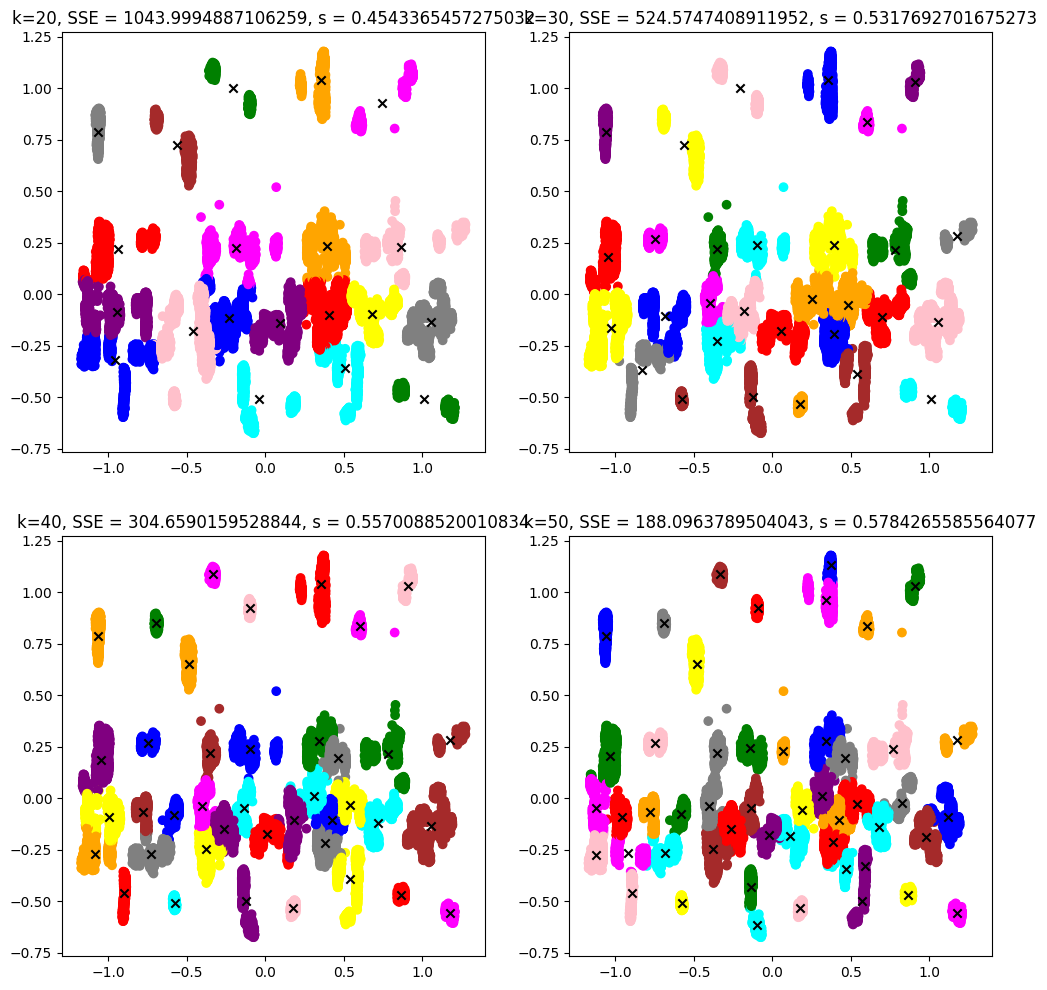

In [61]:
ks = [20, 30, 40, 50]
inits = ['k-means++']
idx = 1
fig = plt.figure(figsize=(12, 12))

for k in ks:
    for init in inits:
        kmeans = KMeans(n_clusters=k, init=init, n_init=10)
        kmeans.fit(X_PCA2)
        
        fig.add_subplot(int(len(ks)/2), 2, idx)
        idx += 1
        #print(f'ovde{idx}')
        #print(silhouette_score(X_PCA2, kmeans.labels_))
        
        plt.scatter(X_PCA2.iloc[:, 0], X_PCA2.iloc[:, 1], c=kmeans.labels_, cmap= ListedColormap(color_list[:k]))
        
        centroids = pd.DataFrame(kmeans.cluster_centers_)
        plt.scatter(centroids.iloc[:, 0], centroids.iloc[:, 1], c='black', marker='x')
        plt.title(f'k={k}, SSE = {kmeans.inertia_}, s = {silhouette_score(X_PCA2, kmeans.labels_)}')

Text(0.5, 1.0, 'k=11, SSE = 2228.727158529109')

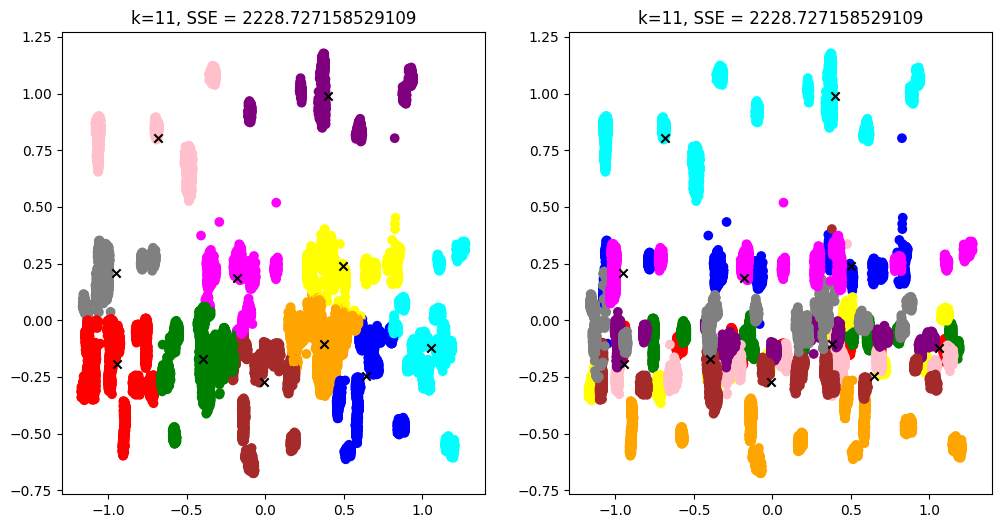

In [64]:
k=11
init = 'k-means++'
fig = plt.figure(figsize=(12, 6))


kmeans = KMeans(n_clusters=k, init=init, n_init=10)
kmeans.fit(X_PCA2)

fig.add_subplot(1, 2, 1)
plt.scatter(X_PCA2.iloc[:, 0], X_PCA2.iloc[:, 1], c=kmeans.labels_, cmap= ListedColormap(color_list[:k]))
centroids = pd.DataFrame(kmeans.cluster_centers_)
plt.scatter(centroids.iloc[:, 0], centroids.iloc[:, 1], c='black', marker='x')
plt.title(f'k={k}, SSE = {kmeans.inertia_}')

fig.add_subplot(1, 2, 2)
plt.scatter(X_PCA2.iloc[:, 0], X_PCA2.iloc[:, 1], c=y, cmap= ListedColormap(color_list[:k]))
centroids = pd.DataFrame(kmeans.cluster_centers_)
plt.scatter(centroids.iloc[:, 0], centroids.iloc[:, 1], c='black', marker='x')
plt.title(f'k={k}, SSE = {kmeans.inertia_}')

In [9]:
#agglomerative

In [10]:
from sklearn.cluster import AgglomerativeClustering

In [11]:
ac2 = AgglomerativeClustering(n_clusters = 11, linkage='average')

In [12]:
import pandas as pd

In [13]:
n = 11
numOfClassInstances = int(len(X_PCA2) / n)
numOfClassSamples = 1500
X_curr_sampled = []
instance_samples = []
for i in range(n):
    X_curr = X_PCA2.iloc[i*numOfClassInstances : (i+1)*numOfClassInstances, :]
    X_curr_sampled.append(X_curr.sample(numOfClassSamples))
    instance_samples.append(X_curr.sample(1))
X_PCA2_sampled = pd.concat(X_curr_sampled, axis=0)
#X_PCA2_sampled

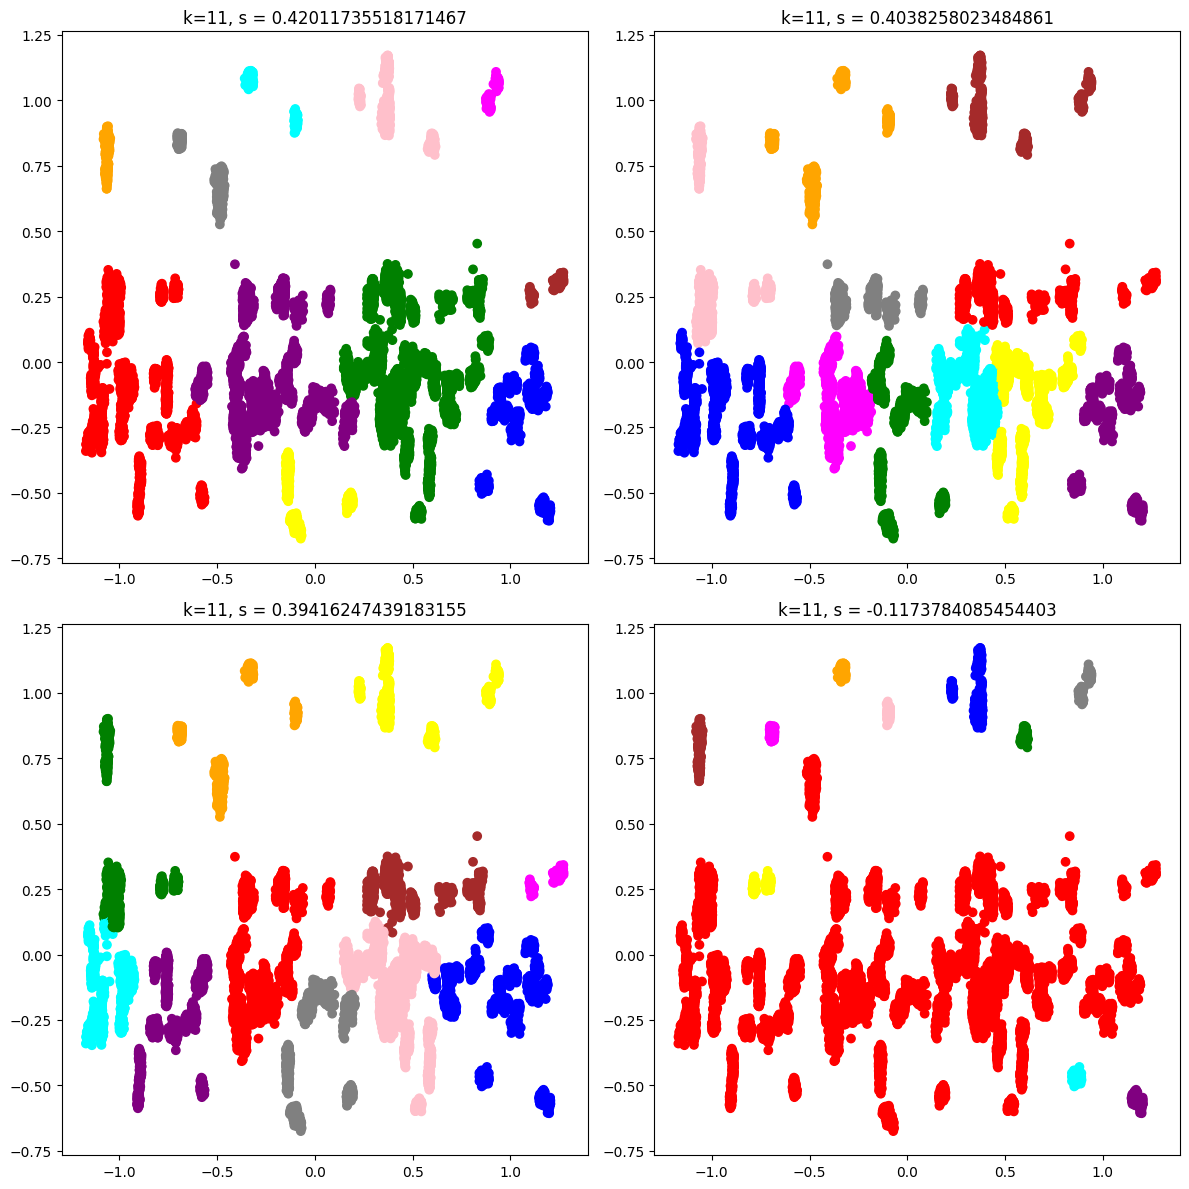

In [17]:
ks = [11]
linkages = ['average', 'ward', 'complete', 'single']
idx = 1
fig = plt.figure(figsize=(12, 12))

for k in ks:
    for linkage in linkages:
        ac = AgglomerativeClustering(n_clusters=k, linkage=linkage)
        ac.fit(X_PCA2_sampled)
        
        fig.add_subplot(2, 2, idx)
        idx += 1
    
        plt.scatter(X_PCA2_sampled.iloc[:, 0], X_PCA2_sampled.iloc[:, 1], c=ac.labels_, cmap= ListedColormap(color_list[:k]))
        
        plt.title(f'k={k}, s = {silhouette_score(X_PCA2_sampled, ac.labels_)}')
plt.tight_layout()

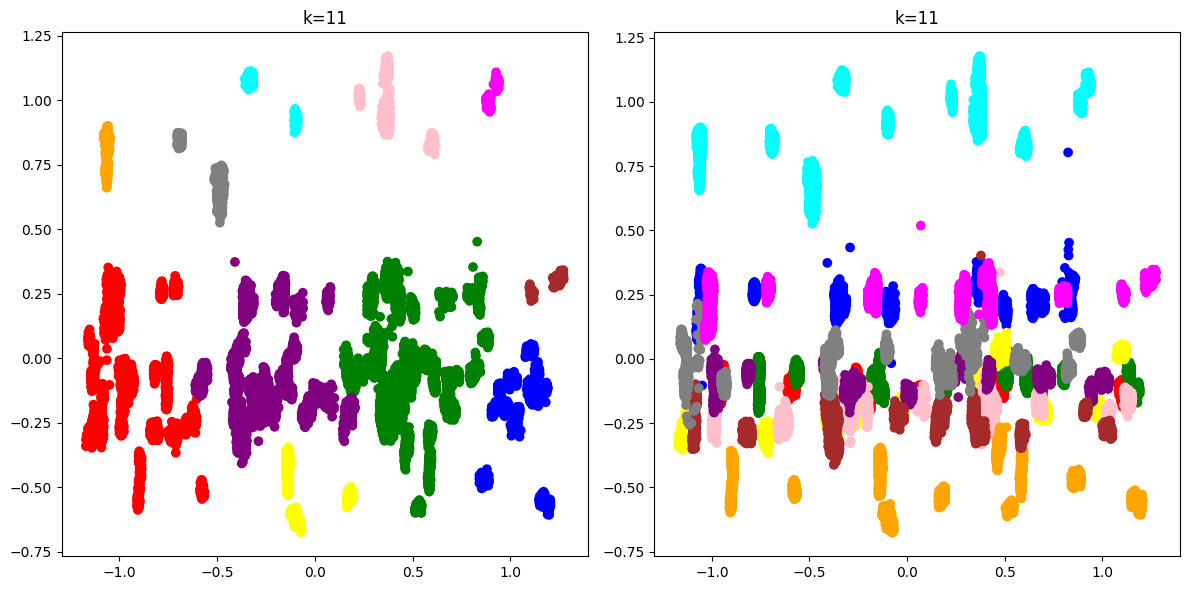

In [21]:
k=11
linkage = 'average'
fig = plt.figure(figsize=(12, 6))


ag = AgglomerativeClustering(n_clusters=11, linkage=linkage)
ag.fit(X_PCA2_sampled)

fig.add_subplot(1, 2, 1)
plt.scatter(X_PCA2_sampled.iloc[:, 0], X_PCA2_sampled.iloc[:, 1], c=ag.labels_, cmap= ListedColormap(color_list[:k]))
#centroids = pd.DataFrame(ag.cluster_centers_)
#plt.scatter(centroids.iloc[:, 0], centroids.iloc[:, 1], c='black', marker='x')
plt.title(f'k={k}')

fig.add_subplot(1, 2, 2)
plt.scatter(X_PCA2.iloc[:, 0], X_PCA2.iloc[:, 1], c=y, cmap= ListedColormap(color_list[:k]))
#centroids = pd.DataFrame(kmeans.cluster_centers_)
#plt.scatter(centroids.iloc[:, 0], centroids.iloc[:, 1], c='black', marker='x')
plt.title(f'k={k}')
          
plt.tight_layout()

In [21]:
from scipy.cluster.hierarchy import linkage, dendrogram

In [17]:
Z = linkage(X_PCA2_sampled, method='average')
Z

array([[2.49000000e+02, 8.31000000e+02, 2.70544234e-05, 2.00000000e+00],
       [8.08100000e+03, 8.29300000e+03, 3.12136856e-05, 2.00000000e+00],
       [1.06840000e+04, 1.11240000e+04, 3.63727391e-05, 2.00000000e+00],
       ...,
       [3.29930000e+04, 3.29950000e+04, 1.06587644e+00, 8.64200000e+03],
       [3.29890000e+04, 3.29940000e+04, 1.12621864e+00, 7.85800000e+03],
       [3.29960000e+04, 3.29970000e+04, 1.16214062e+00, 1.65000000e+04]])

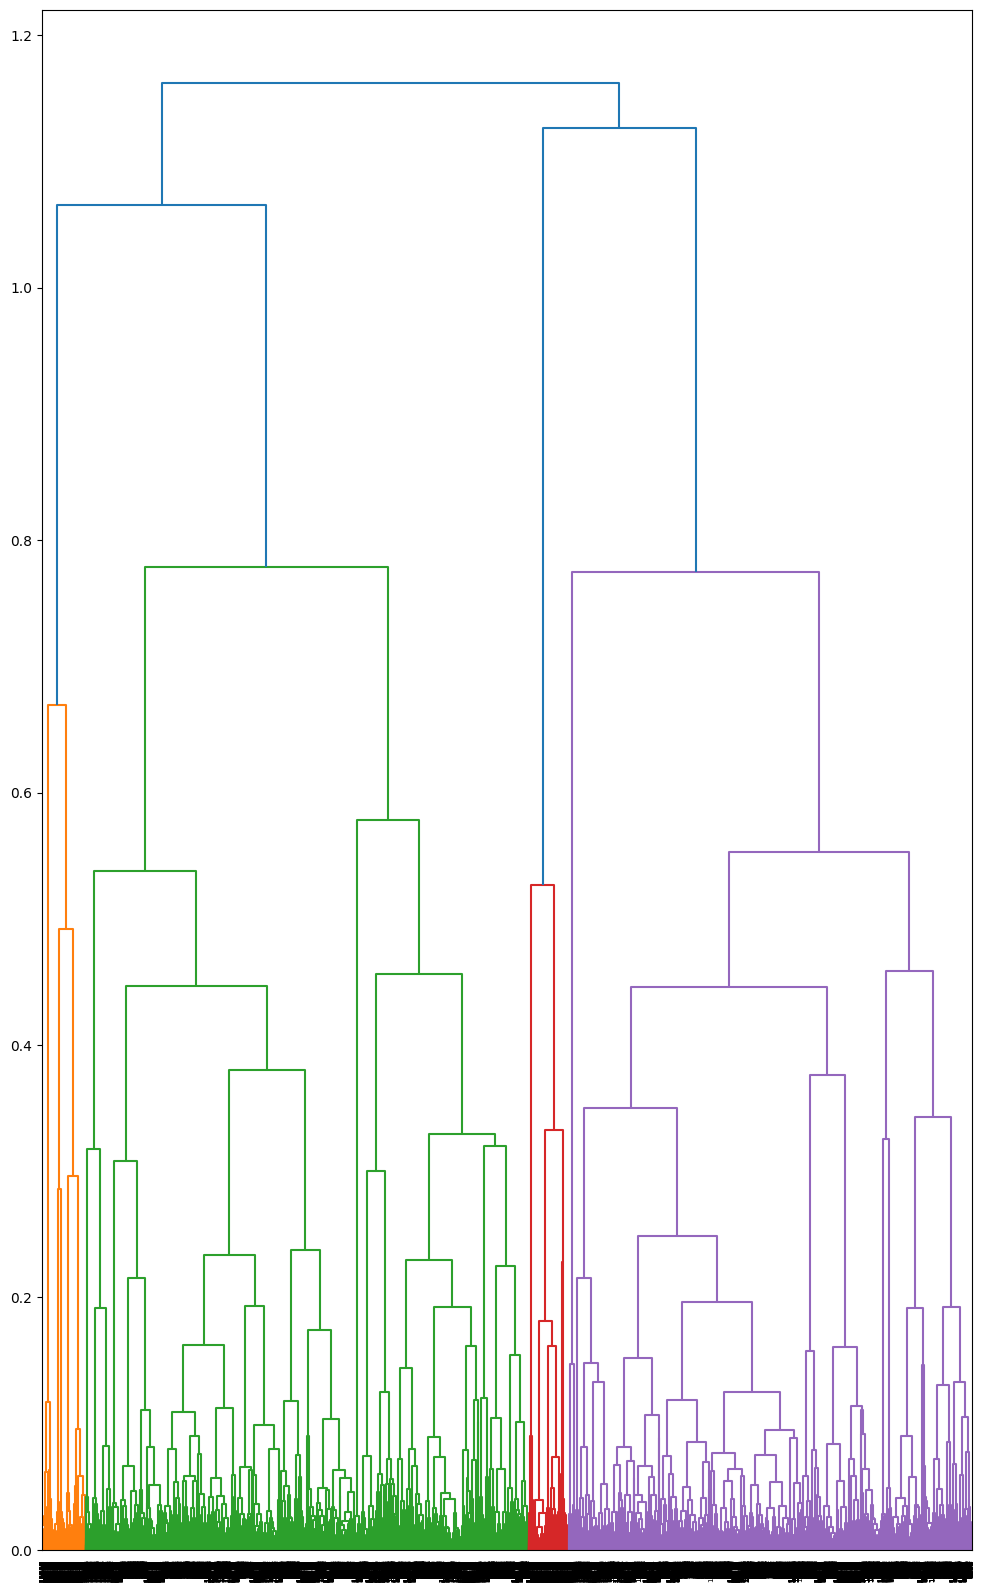

In [24]:
fig = plt.figure(figsize=(12, 20))
_ = dendrogram(Z, leaf_rotation=90)

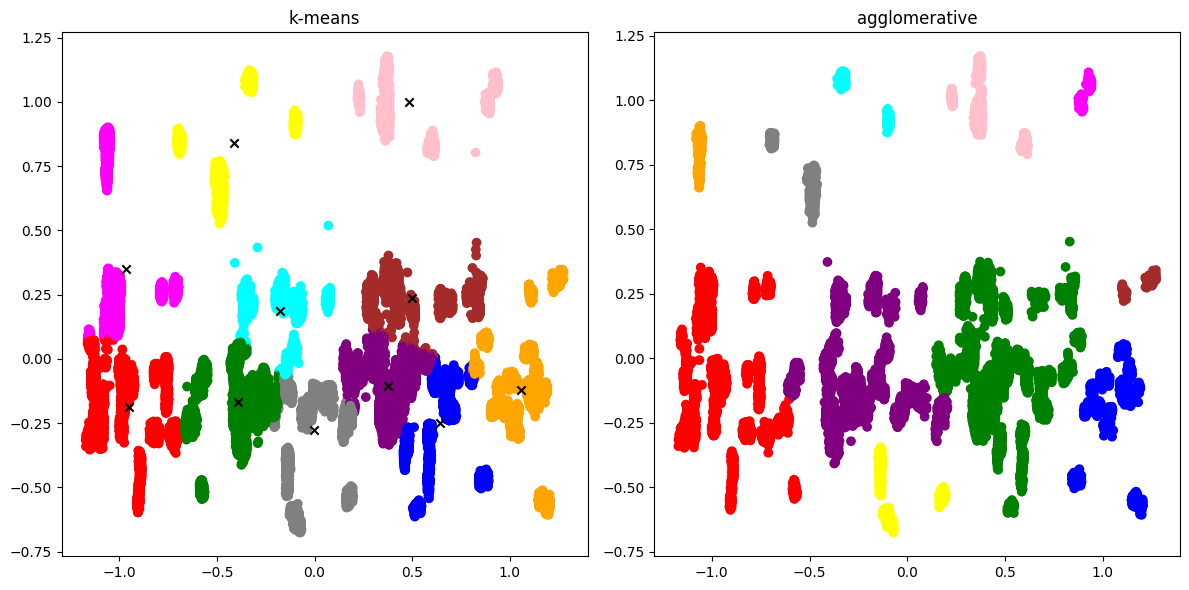

In [24]:
fig = plt.figure(figsize=(12, 6))

kmeans = KMeans(n_clusters=11, init='k-means++', n_init=10)
kmeans.fit(X_PCA2)

fig.add_subplot(1, 2, 1)
plt.scatter(X_PCA2.iloc[:, 0], X_PCA2.iloc[:, 1], c=kmeans.labels_, cmap= ListedColormap(color_list[:k]))
centroids = pd.DataFrame(kmeans.cluster_centers_)
plt.scatter(centroids.iloc[:, 0], centroids.iloc[:, 1], c='black', marker='x')
plt.title('k-means')


ag = AgglomerativeClustering(n_clusters=11, linkage='average')
ag.fit(X_PCA2_sampled)

fig.add_subplot(1, 2, 2)
plt.scatter(X_PCA2_sampled.iloc[:, 0], X_PCA2_sampled.iloc[:, 1], c=ag.labels_, cmap= ListedColormap(color_list[:k]))
#centroids = pd.DataFrame(ag.cluster_centers_)
#plt.scatter(centroids.iloc[:, 0], centroids.iloc[:, 1], c='black', marker='x')
plt.title('agglomerative')
          
plt.tight_layout()